In [3]:
# Import libraries and data
import os
import numpy as np
import pickle

from src.utils.linear_regressor import perform_linear_regression
from config.settings import ROOT_DIR, saved_models_path
from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y = columns


/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/inD/x_y_recording_00_range_384.csv
/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/scenario_samples/lane_merging/dif_set/test_set_00.csv


# Ballistic acceleration model

## Matrix creation

In [4]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate(y_test, y_pred):
    
    # Evaluate the model using various metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results in scientific notation
    print(f'Mean Squared Error (MSE): {mse:.4e}')
    print(f'Mean Absolute Error (MAE): {mae:.4e}')
    print(f'R-squared (R²) Score: {r2:.4e}')

    # Create a scatter plot
    plt.scatter(y_test, y_pred, alpha=0.7)

    # Add a diagonal line for reference (perfect prediction)
    min_val = min(np.min(y_test), np.min(y_pred))
    max_val = max(np.max(y_test), np.max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

    # Add labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Test')

    # Set aspect ratio to be equal
    plt.gca().set_aspect('equal', adjustable='box')

    # Show legend
    plt.legend()

    plt.gcf().set_size_inches(7,7)  # Adjust the size as needed


    # Show the plot
    plt.show()



Mean Squared Error (MSE): 2.7383e-02
Mean Absolute Error (MAE): 1.0823e-01
R-squared (R²) Score: 9.1689e-01
Coefficients:
-0.0009987776743180478
-0.8704124149313284
0.0038258219986857384


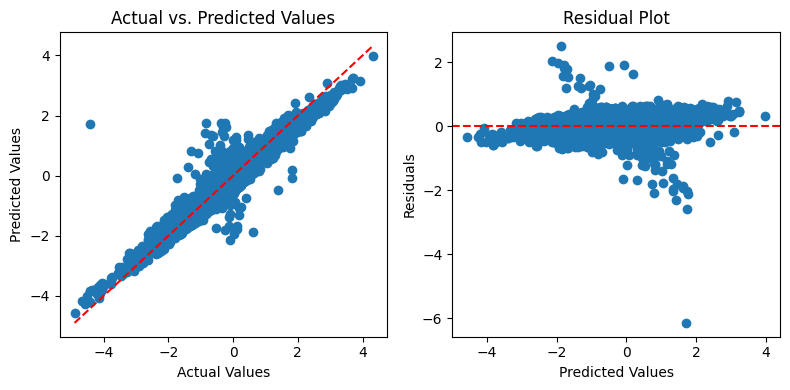

In [62]:
# Target vector y
y = np.concatenate([a_x[0:-2], a_y[0:-2]])    # a(k)
y.shape

dt = 0.04
dt_2 = dt ** 2 / 2 
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:

dt = 0.04
A =  s_x[2:] - s_x[1:-1] - a_x[1:-1]  - dt*v_x[0:-2]
E =  s_y[2:] - s_y[1:-1] - a_y[1:-1]  - dt* v_y[0:-2]              

B = - a_x[2:] - dt * v_x[1:-1] 
F = - a_y[2:] - dt * v_y[1:-1]

C = - s_x[1:-1]- a_x[2:] 
G = - s_y[1:-1]- a_y[2:]                 




X_a = np.vstack((
    np.column_stack((A, B, C)), 
    np.column_stack((E, F, G))
    ))
X_a.shape

first_model = perform_linear_regression(X_a, y)

c_1 = 1/first_model.coef_[0]
c_2 = first_model.coef_[1]/c_1
c_3 = first_model.coef_[2]/c_1

In [9]:
print(c_1, c_2, c_3)

68.33960421491442 -0.013276455350571956 0.0002553291452835658


In [2]:
c_1 = 0.1
c_2 = 0.1
c_3 = 1
s_x_pred = c_1 * a_x[0:-2] + c_2 * (a_x[2:] + dt*v_x[1:-1]) + c_3 * s_x[1:-1]
s_y_pred = c_1 * a_y[0:-2] + c_2 * (a_y[2:] + dt*v_y[1:-1]) + c_3 * s_y[1:-1]

evaluate(s_x_pred, s_x[2:])
evaluate(s_y_pred, s_y[2:])


NameError: name 'a_x' is not defined

Mean Squared Error (MSE): 3.0955e-03
Mean Absolute Error (MAE): 1.1690e-02
R-squared (R²) Score: 9.9060e-01
Coefficients:
-0.9952416326195912
1.5983549942566857e-06


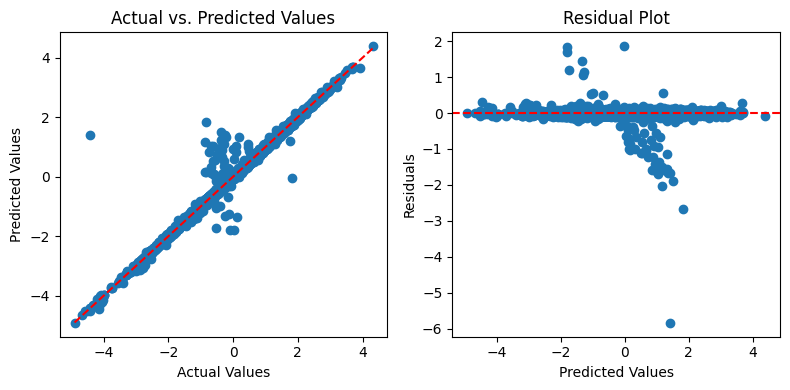

array([-9.95241633e-01,  1.59835499e-06])

In [11]:
# Input features X_b of the second model
dt = 0.04
A = - a_x[1:-1]                                 
B = - a_y[1:-1]                                 
C = s_x[2:] - s_x[1:-1] - dt * v_x[1:-1]        
D = s_y[2:] - s_y[1:-1] - dt * v_y[1:-1]        

X_b = np.vstack((
    np.column_stack((A, C)), 
    np.column_stack((B, D))
    ))
X_b.shape


second_model = perform_linear_regression(X_b, y)
second_model.coef_

-622666.2013105717 625643.2417036677
Mean Squared Error (MSE): 1.6516e+09
Mean Absolute Error (MAE): 7.6181e+03
R-squared (R²) Score: -1.3795e-04


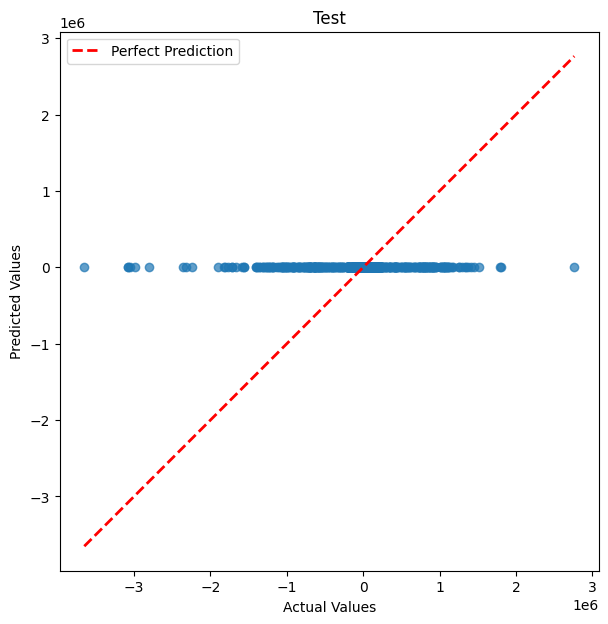

Mean Squared Error (MSE): 8.0852e+08
Mean Absolute Error (MAE): 7.0918e+03
R-squared (R²) Score: -4.6189e-05


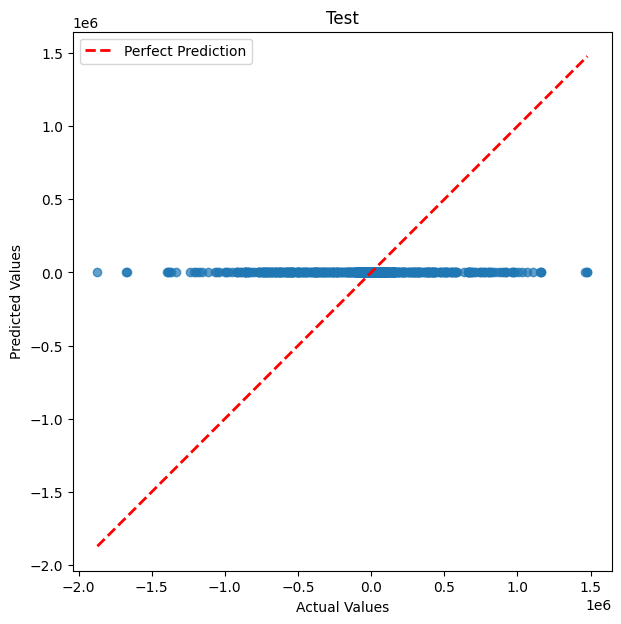

In [12]:
c_2 = 1/second_model.coef_[1]
c_1 = second_model.coef_[0] *c_2
print(c_1, c_2)

v_x_pred = v_x[1:-1] + c_1 * a_x[1:-1] + c_2 * a_x[0:-2]
v_y_pred = v_y[1:-1] + c_1 * a_y[1:-1] + c_2 * a_y[0:-2]


evaluate(v_x_pred, v_x[2:])
evaluate(v_y_pred, v_y[2:])

